## Assignment 8

#### Name : Raswanth S.R
#### RollNum : CB.EN.U4CSE19648

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [23]:
from sklearn import datasets

iris = datasets.load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
X = df.drop('target', axis=1)
y = df.target

In [25]:
def dist(a, b, p=1):
    
    dim = len(a)
    distance = 0
    for d in range(dim):
        distance += abs(a[d] - b[d])**p     
    distance = distance**(1/p)
    return distance

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
X_train

array([[ 0.31553662, -0.04578885,  0.44767531,  0.23380268],
       [ 2.2449325 , -0.04578885,  1.29769171,  1.39742892],
       [-0.2873996 , -1.24028061,  0.05100098, -0.15407273],
       [ 0.67729835, -0.52358555,  1.01435291,  1.13884531],
       [-0.04622511, -0.52358555,  0.73101411,  1.52672073],
       [-0.64916132,  1.62649961, -1.30902526, -1.31769898],
       [-0.40798684, -1.71807731,  0.10766874,  0.10451088],
       [-0.76974857,  0.90980456, -1.36569302, -1.31769898],
       [ 0.79788559, -0.52358555,  0.44767531,  0.36309449],
       [ 1.03906007, -1.24028061,  1.12768843,  0.7509699 ],
       [ 1.15964732, -0.04578885,  0.95768515,  1.13884531],
       [-0.89033581,  1.14870291, -1.36569302, -1.18840717],
       [ 0.19494938, -1.95697567,  0.67434635,  0.36309449],
       [ 0.5567111 , -0.2846872 ,  1.01435291,  0.7509699 ],
       [ 0.91847283, -0.2846872 ,  0.44767531,  0.10451088],
       [ 2.2449325 , -1.00138226,  1.75103379,  1.39742892],
       [-0.16681235,  1.

In [29]:
X_test

array([[-0.04622511,  2.34319467, -1.47902854, -1.31769898],
       [-0.89033581, -1.24028061, -0.45900886, -0.15407273],
       [ 0.91847283, -0.04578885,  0.33433978,  0.23380268],
       [-0.52857408,  2.10429632, -1.42236078, -1.05911537],
       [ 2.48610699,  1.86539796,  1.46769499,  1.00955351],
       [ 0.5567111 ,  0.6709062 ,  0.50434307,  0.49238629],
       [ 1.28023456,  0.1931095 ,  0.73101411,  1.39742892],
       [-0.89033581,  1.86539796, -1.08235422, -1.05911537],
       [-1.37268478,  0.43200785, -1.2523575 , -1.31769898],
       [ 1.28023456,  0.43200785,  1.07102067,  1.39742892],
       [-0.2873996 , -0.76248391,  0.22100426,  0.10451088],
       [-0.52857408,  2.10429632, -1.19568974, -1.05911537],
       [ 1.52140905, -0.04578885,  1.18435619,  1.13884531],
       [ 0.67729835,  0.43200785,  0.39100755,  0.36309449],
       [ 0.19494938, -0.2846872 ,  0.39100755,  0.36309449],
       [-1.73444651,  0.43200785, -1.42236078, -1.31769898],
       [-0.04622511, -1.

In [30]:
def knn_predict(X_train, X_test, y_train, y_test, k, p):
    
    from collections import Counter
    y_pred_test = []

    for test_point in X_test:
        distances = []
        for train_point in X_train:
            distance = dist(test_point, train_point, p=p)
            distances.append(distance)
        df_dists = pd.DataFrame(data=distances, columns=['dist'], 
                                index=y_train.index)
        df_nearest = df_dists.sort_values(by=['dist'], axis=0)[:k]
        counter = Counter(y_train[df_nearest.index])
        prediction = counter.most_common()[0][0]
        y_pred_test.append(prediction)
        
    return y_pred_test

In [31]:
y_pred_test = knn_predict(X_train, X_test, y_train, y_test, k=5, p=1)

In [32]:
y_pred_test

[0,
 1,
 1,
 0,
 2,
 1,
 2,
 0,
 0,
 2,
 1,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 2,
 0,
 2,
 1,
 0,
 0,
 1,
 2]

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_test)

0.9666666666666667

In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)

Text(69.0, 0.5, 'Truth')

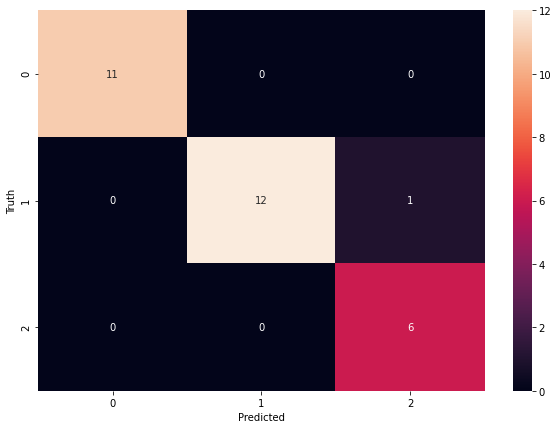

In [37]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

